## Exercise 5: Recurrent Neural Networks (RNNs)

Task: text sentiment classicification of the IMDB dataset (<i>https://keras.io/api/datasets/imdb/</i>)

### 1.1 Download and explore training/test data

In [2]:
import numpy as np
import typing
import seaborn as sns
from matplotlib import pyplot as plt
from keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

In [3]:
# Load IMDB dataset
Num_Words = 2000
Max_Len = 512
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=Num_Words)
print(type(x_train))

<class 'numpy.ndarray'>


In [4]:
print(x_train.shape, y_train.shape)
print(x_train[:1,]) # a list of words represented by word index (0-1999 in descending order of frequency)
print(x_test[:1,])
print(y_train[:5,]) # binary label, either positive or negative

(25000,) (25000,)
[list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 1920, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32])]
[list([1, 591, 202, 14, 31, 6, 717, 10, 10, 2, 2, 5, 4, 360, 7, 4, 177, 2, 394,

### 1.2 Perform explanatory data analysis (EDA)

In [4]:
print("Unique y_train values:", np.unique(y_train))
print("Unique y_test values:", np.unique(y_test))

Unique y_train values: [0 1]
Unique y_test values: [0 1]


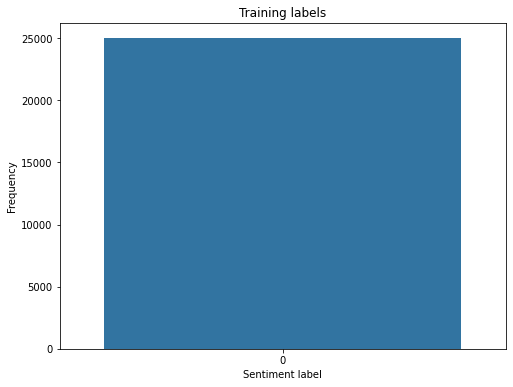

In [5]:
# explore the frequencies of negative/positive comments at the training/test dataset using seaborn's visualization
plt.figure(figsize=(8, 6))
sns.countplot(y_train)
plt.xlabel("Sentiment label")
plt.ylabel("Frequency")
plt.title("Training labels")
plt.show()

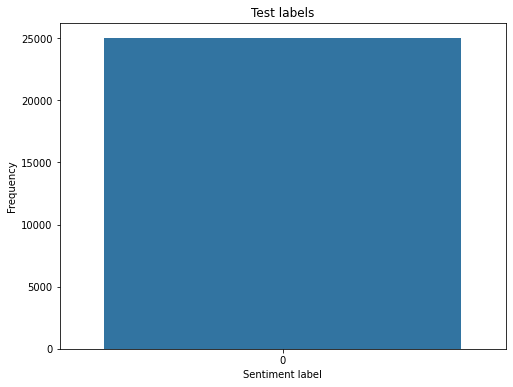

In [274]:
plt.figure(figsize=(8, 6))
sns.countplot(y_test)
plt.xlabel("Sentiment label")
plt.ylabel("Frequency")
plt.title("Test labels")
plt.show()

In [6]:
# explore the frequencies of indexed words (sorted in descending order by frequency) 
# explore the number of words per review
print(x_train.shape==x_test.shape)

flattened_train_reviews: typing.List[int] = []
flattened_test_reviews: typing.List[int] = []
lens_train_reviews: typing.List[int] = []
lens_test_reviews: typing.List[int] = []

for train_review, test_review in zip(x_train, x_test):
    flattened_train_reviews.extend(train_review)
    flattened_test_reviews.extend(test_review)
    lens_train_reviews.append(len(train_review))
    lens_test_reviews.append(len(test_review))

True


<Figure size 691.2x388.8 with 0 Axes>

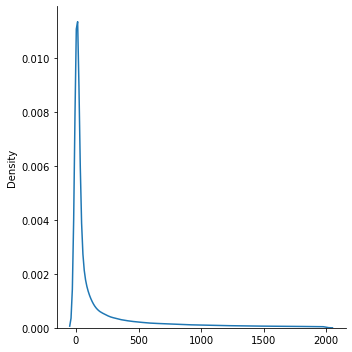

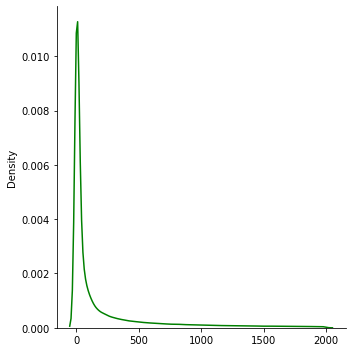

In [7]:
# visualization of word frequencies by index
plt.figure(figsize = (16*0.6, 9*0.6))
sns.displot(flattened_train_reviews, kind='kde')
plt.show()
sns.displot(flattened_test_reviews, kind='kde', color='green')
plt.show()

<Figure size 748.8x421.2 with 0 Axes>

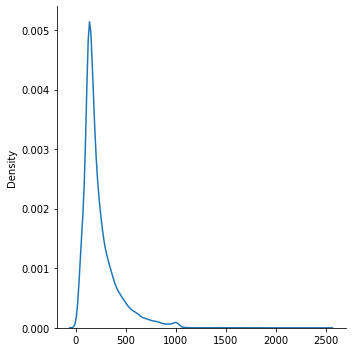

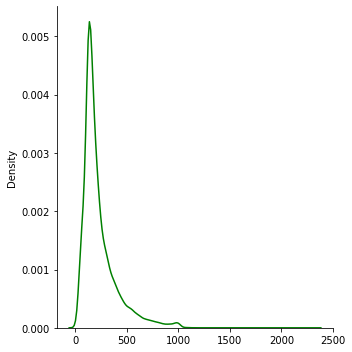

In [8]:
# visualization of review lengths
plt.figure(figsize = (16*0.65, 9*0.65))
sns.displot(lens_train_reviews, kind='kde')
plt.show()
sns.displot(lens_test_reviews, kind='kde', color='green')
plt.show()

### 1.3 Download LSTM tokenizer to examine the real texts

In [9]:
word_indeces = imdb.get_word_index()
print(f'Type of \'word_indeces\': {type(word_indeces)}, length of \'word indeces\': {len(word_indeces)}')

Type of 'word_indeces': <class 'dict'>, length of 'word indeces': 88584


In [280]:
top_10to30_set = set([i for i in range(10, 31)]) 
freq10to30_word_list: typing.List[typing.Tuple] = []

for k, v in word_indeces.items():
    if v in top_10to30_set:
        freq10to30_word_list.append((k, v))

freq10to30_word_list = sorted(freq10to30_word_list, key=lambda tup: tup[1])
for word in freq10to30_word_list:
    print(f'{word[1]} represents: \'{word[0]}\'')

10 represents: 'i'
11 represents: 'this'
12 represents: 'that'
13 represents: 'was'
14 represents: 'as'
15 represents: 'for'
16 represents: 'with'
17 represents: 'movie'
18 represents: 'but'
19 represents: 'film'
20 represents: 'on'
21 represents: 'not'
22 represents: 'you'
23 represents: 'are'
24 represents: 'his'
25 represents: 'have'
26 represents: 'he'
27 represents: 'be'
28 represents: 'one'
29 represents: 'all'
30 represents: 'at'


In [10]:
detokenizer: typing.Dict[int, str] = {v: k for k, v in word_indeces.items()}

def get_literal_review(detokenizer: typing.Dict[int, str], tokenized_input_list: typing.List[str]) -> str:
    return ' '.join([detokenizer.get(ind - 3, '-') for ind in tokenized_input_list])

In [11]:
get_literal_review(detokenizer, x_train[0])

"- this film was just brilliant casting location scenery story direction - really - the part they played and you could just imagine being there robert - is an amazing actor and now the same being director - father came from the same - island as myself so i loved the fact there was a real - with this film the witty - throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for - and would recommend it to everyone to watch and the - - was amazing really - at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also - to the two little - that played the - of - and paul they were just brilliant children are often left out of the - list i think because the stars that play them all - up are such a big - for the whole film but these children are amazing and should be - for what they have done don't you think the whole story was so lovely because it was true and was - life afte

### 1.4 Pre-process training/test data

In [5]:
# data preprocessing
x_train = pad_sequences(x_train, maxlen=Max_Len)
x_test = pad_sequences(x_test, maxlen=Max_Len)

### 2. Create an RNN model and a LSTM model respectively via Functional API and encode the input data

In [6]:
from keras import Model, Input
from keras.layers import *

#### An excellent post to understand RNN and LSTM: http://colah.github.io/posts/2015-08-Understanding-LSTMs/
#### A reference to convert a Sequential model to a functional API model for RNN> https://stackoverflow.com/questions/49354382/simplifying-a-keras-lstm-model-in-functional-api
#### A tutorial to basic RNN models e.g., Vanilla RNN and LSTM: https://github.com/buomsoo-kim/Easy-deep-learning-with-Keras/tree/master/3.%20RNN/1-Basic-RNN

In [14]:
x_train.shape

(25000, 512)

In [11]:
# shape=(timestep, n_feature)
adam = tf.keras.optimizers.Adam(learning_rate=2e-3)
inputs = Input(shape=(Max_Len))
# construct the vanilla RNN model
vanilla_model = Embedding(Num_Words, 16)(inputs)
vanilla_model = SimpleRNN(8, return_sequences=True, activation='relu')(vanilla_model)
vanilla_model = SimpleRNN(8, return_sequences=False)(vanilla_model)
vanilla_model = Dense(1, activation='sigmoid')(vanilla_model)
vanilla_model = Model(inputs=inputs, outputs=vanilla_model, name='imdb_vanilla_rnn')
vanilla_model.compile(loss = 'binary_crossentropy', optimizer=adam, metrics=['accuracy'])
vanilla_model.summary()

Model: "imdb_vanilla_rnn"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 512)]             0         
                                                                 
 embedding_4 (Embedding)     (None, 512, 16)           32000     
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, 512, 8)            200       
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 8)                 136       
                                                                 
 dense_4 (Dense)             (None, 1)                 9         
                                                                 
Total params: 32,345
Trainable params: 32,345
Non-trainable params: 0
_________________________________________________________________


In [12]:
# construct the long short term memory (LSTM) model
lstm_model = Embedding(Num_Words, 16)(inputs)
lstm_model = LSTM(8, input_shape=(Num_Words, 16), return_sequences=True)(lstm_model)
lstm_model = LSTM(8, return_sequences=False)(lstm_model)
lstm_model = Dense(1, activation='sigmoid')(lstm_model)
lstm_model = Model(inputs=inputs, outputs=lstm_model, name='imdb_lstm')
lstm_model.compile(loss = 'binary_crossentropy', optimizer=adam, metrics=['accuracy'])
lstm_model.summary()

Model: "imdb_lstm"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 512)]             0         
                                                                 
 embedding_5 (Embedding)     (None, 512, 16)           32000     
                                                                 
 lstm_4 (LSTM)               (None, 512, 8)            800       
                                                                 
 lstm_5 (LSTM)               (None, 8)                 544       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 33,353
Trainable params: 33,353
Non-trainable params: 0
_________________________________________________________________


### 3. Train the aforementioned models and check their accuracies

In [13]:
vanilla_history = vanilla_model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 10, batch_size = 64, verbose = 1)

Epoch 1/10


In [ ]:
lstm_history = lstm_model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 10, batch_size = 64, verbose = 1)